In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Data

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
path


PosixPath('/home/jupyter/.fastai/data/cifar10')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/train'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test')]

In [9]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/train/horse'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/automobile'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/dog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/cat'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/ship'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/airplane'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/bird'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/frog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/truck'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/deer')]

In [10]:
np.random.seed(2)

Validation set is empty, hence setting valid_pct as 20%

In [37]:
data = ImageDataBunch.from_folder(path,ds_tfms=get_transforms(),size=26,valid_pct=0.2).normalize(imagenet_stats)

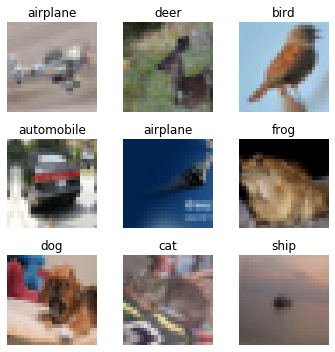

In [38]:
data.show_batch(rows=3,figsize=(5,5))

In [39]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [18]:
data.c

10

## Model

In [40]:
learn = cnn_learner(data,models.resnet18,metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.602931,1.428395,0.487667,00:38
1,1.400407,1.238243,0.557250,00:38


In [41]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.282127,1.126773,0.595667,00:38
1,1.198918,1.052729,0.624667,00:38
2,1.137803,0.998031,0.644583,00:38


In [42]:
learn.save('stage-1')

## Results

In [43]:
interp = ClassificationInterpretation.from_learner(learn)

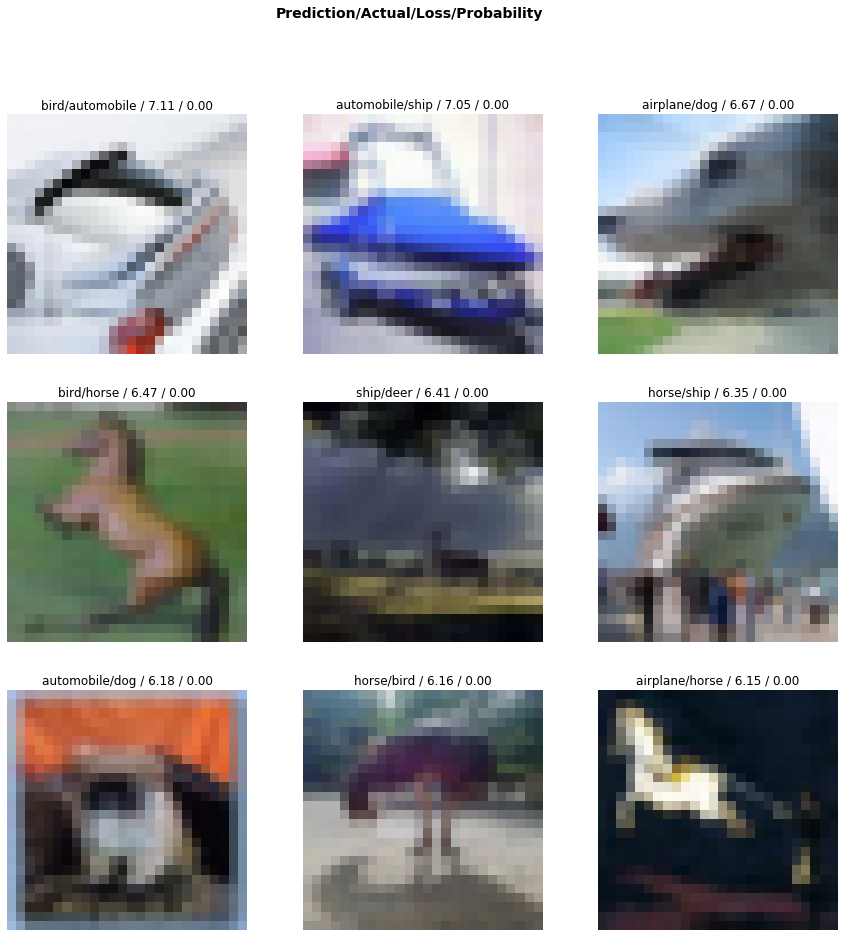

In [44]:
interp.plot_top_losses(9,figsize=(15,15))

In [45]:
interp.most_confused(min_val=2)

[('cat', 'dog', 254),
 ('truck', 'automobile', 217),
 ('dog', 'cat', 196),
 ('automobile', 'truck', 190),
 ('deer', 'horse', 139),
 ('airplane', 'ship', 138),
 ('ship', 'airplane', 116),
 ('horse', 'deer', 109),
 ('frog', 'cat', 107),
 ('deer', 'bird', 106),
 ('horse', 'dog', 101),
 ('bird', 'deer', 97),
 ('bird', 'dog', 91),
 ('bird', 'frog', 87),
 ('cat', 'frog', 85),
 ('deer', 'frog', 82),
 ('dog', 'horse', 82),
 ('frog', 'bird', 80),
 ('airplane', 'bird', 76),
 ('bird', 'cat', 75),
 ('bird', 'airplane', 74),
 ('frog', 'dog', 74),
 ('ship', 'automobile', 74),
 ('frog', 'deer', 67),
 ('cat', 'bird', 66),
 ('dog', 'bird', 66),
 ('cat', 'deer', 62),
 ('truck', 'ship', 59),
 ('cat', 'horse', 58),
 ('dog', 'deer', 58),
 ('deer', 'cat', 54),
 ('truck', 'airplane', 53),
 ('horse', 'cat', 52),
 ('deer', 'airplane', 50),
 ('deer', 'dog', 50),
 ('automobile', 'ship', 46),
 ('dog', 'frog', 42),
 ('truck', 'horse', 42),
 ('airplane', 'truck', 40),
 ('ship', 'truck', 39),
 ('bird', 'horse', 37),

## Improving the model

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


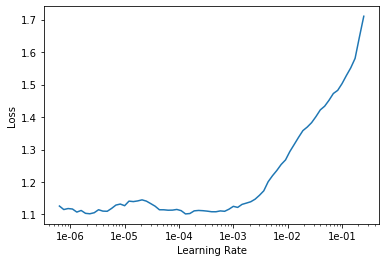

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.065339,0.954638,0.661000,00:39
1,1.038675,0.938897,0.667333,00:39


In [28]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.030753,0.907247,0.681250,00:38
1,0.969001,0.874966,0.691667,00:38
2,0.999831,0.869663,0.693250,00:39


In [29]:
learn.save('stage-2')

## Resnet 50

In [46]:
data = ImageDataBunch.from_folder(path,ds_tfms=get_transforms(),
                                  size=26,bs=32,valid_pct=0.2).normalize(imagenet_stats)




In [47]:
learn = cnn_learner(data,models.resnet50,metrics=accuracy)

In [48]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.765943,1.689483,0.455583,01:13
1,1.323920,1.212905,0.585583,01:12
2,1.169633,0.979168,0.658667,01:12
3,1.023135,0.910276,0.682000,01:12
4,1.012892,0.894304,0.688917,01:12


In [49]:
learn.save('stage-1-res50')

In [50]:
learn.unfreeze()

In [51]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


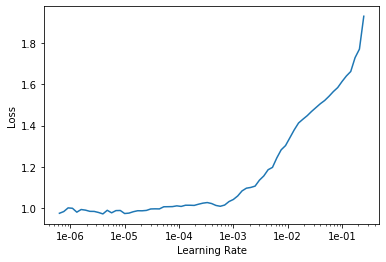

In [52]:
learn.recorder.plot()

In [53]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.946978,0.831950,0.710083,01:26
1,0.928218,0.775528,0.727583,01:27
2,0.913079,0.767484,0.731167,01:29


In [54]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.847581,0.751527,0.738250,01:28
1,0.790054,0.708710,0.754917,01:28
